In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#pseudo labeling하고 싶은 csv파일 불러오기
df = pd.read_csv("../../baseline/faster_rcnn/faster_rcnn_torchvision_submission.csv")
print(df.head(8))

                                    PredictionString       image_id
0  7 0.9996656179428101 224.65460205078125 48.984...  test/0000.jpg
1  3 0.923716127872467 328.6533508300781 255.8080...  test/0001.jpg
2  1 0.9948869347572327 82.35867309570312 277.863...  test/0002.jpg
3  9 0.998301088809967 126.45570373535156 255.289...  test/0003.jpg
4  0 0.5662635564804077 181.50022888183594 384.75...  test/0004.jpg
5  2 0.9882748126983643 353.11328125 232.97552490...  test/0005.jpg
6  7 0.9978870749473572 291.86651611328125 7.3098...  test/0006.jpg
7  9 0.9805135130882263 278.2730407714844 112.863...  test/0007.jpg


In [47]:
import pandas as pd

# 새로운 리스트 생성
data_list = []

# 띄어쓰기로 나눠진 데이터를 6개씩 끊어서 리스트에 추가
for index, row in df.iterrows():
    image_id = row['image_id']
    prediction_string = str(row['PredictionString'])
    split_data = prediction_string.split()
    num_chunks = len(split_data) // 6
    for i in range(num_chunks):
        data_list.append({
            'image_id': image_id,
            'label': split_data[i * 6],
            'score': split_data[i * 6 + 1],
            'xmin': split_data[i * 6 + 2],
            'ymin': split_data[i * 6 + 3],
            'xmax': split_data[i * 6 + 4],
            'ymax': split_data[i * 6 + 5],
        })

# 리스트를 DataFrame으로 변환
new_df = pd.DataFrame(data_list)

# 결과 확인
print(new_df.head())


        image_id label               score                xmin  \
0  test/0000.jpg     7  0.9996656179428101  224.65460205078125   
1  test/0000.jpg     7  0.9990835189819336   604.0383911132812   
2  test/0000.jpg     7  0.9979096055030823  116.61202239990234   
3  test/0000.jpg     7  0.9965432286262512   448.2628479003906   
4  test/0000.jpg     7  0.9958930015563965   638.3026123046875   

                 ymin                xmax               ymax  
0   48.98448944091797  455.61419677734375  472.7590026855469  
1  508.31890869140625   948.9038696289062             1024.0  
2   416.7789611816406   330.6438903808594  727.7249145507812  
3   597.1690673828125    648.461669921875  879.1246948242188  
4   327.5430908203125   878.5621948242188    600.92431640625  


In [48]:
print(new_df.tail(5))

            image_id label                score               xmin  \
87870  test/4869.jpg     9  0.06393565982580185                0.0   
87871  test/4869.jpg     0  0.06317856907844543  952.2785034179688   
87872  test/4869.jpg     0  0.06091472879052162  500.0223693847656   
87873  test/4870.jpg     4   0.9985153079032898  372.8434753417969   
87874  test/4870.jpg     1  0.11272181570529938  19.87027359008789   

                     ymin               xmax                ymax  
87870  251.79237365722656  568.2181396484375   717.9909057617188  
87871     502.62451171875  1022.593017578125         587.1015625  
87872   407.7237548828125  654.0708618164062  492.50616455078125  
87873   196.6433563232422  626.5601806640625   852.9080200195312  
87874  32.464412689208984        731.4921875   725.7349853515625  


In [49]:
label_mapping = {
    '0': 'General trash',
    '1': 'Paper',
    '2': 'Paper pack',
    '3': 'Metal',
    '4': 'Glass',
    '5': 'Plastic',
    '6': 'Styrofoam',
    '7': 'Plastic bag',
    '8': 'Battery',
    '9': 'Clothing'
}

# 라벨 번호를 이름으로 매핑
new_df['label_name'] = new_df['label'].map(label_mapping)

new_df.to_csv('your_output_file.csv', index=False)

print(new_df.tail())

            image_id label                score               xmin  \
87870  test/4869.jpg     9  0.06393565982580185                0.0   
87871  test/4869.jpg     0  0.06317856907844543  952.2785034179688   
87872  test/4869.jpg     0  0.06091472879052162  500.0223693847656   
87873  test/4870.jpg     4   0.9985153079032898  372.8434753417969   
87874  test/4870.jpg     1  0.11272181570529938  19.87027359008789   

                     ymin               xmax                ymax  \
87870  251.79237365722656  568.2181396484375   717.9909057617188   
87871     502.62451171875  1022.593017578125         587.1015625   
87872   407.7237548828125  654.0708618164062  492.50616455078125   
87873   196.6433563232422  626.5601806640625   852.9080200195312   
87874  32.464412689208984        731.4921875   725.7349853515625   

          label_name  
87870       Clothing  
87871  General trash  
87872  General trash  
87873          Glass  
87874          Paper  


      label_name  image_count
2  General trash         4383
5          Paper         3641
8    Plastic bag         3415
4          Metal         2470
7        Plastic         2386
6     Paper pack         2146
1       Clothing         1149
3          Glass          940
9      Styrofoam          771
0        Battery          161


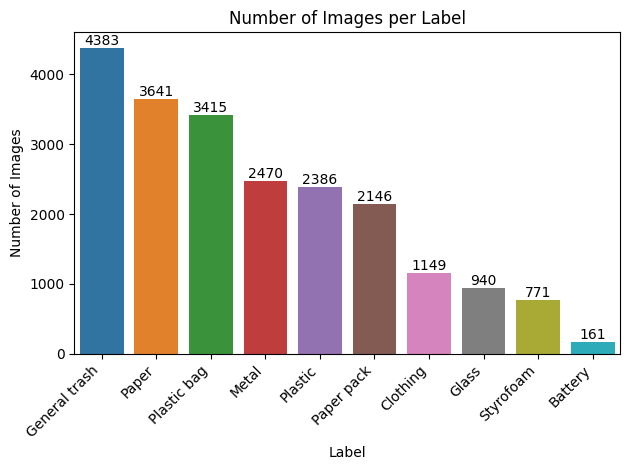

In [50]:
# 라벨(label)별 이미지의 갯수 계산
label_image_counts = new_df.groupby('label_name')['image_id'].nunique().reset_index(name='image_count')
label_image_counts_sorted = label_image_counts.sort_values(by='image_count', ascending=False)

print(label_image_counts_sorted)

# 바 그래프 그리기
ax =sns.barplot(x='label_name', y='image_count', data=label_image_counts_sorted, order=label_image_counts_sorted['label_name'])
plt.title('Number of Images per Label')
plt.xlabel('Label')
plt.ylabel('Number of Images')

for index, value in enumerate(label_image_counts_sorted['image_count']):
    ax.text(index, value, str(value), ha='center', va='bottom')


# x 축 레이블 설정
plt.xticks(rotation=45, ha='right', fontsize=10)  # x 축 레이블 회전 및 정렬, 폰트 크기 조절
plt.tight_layout()  # 레이아웃 조정

plt.show()

      label_name  bbox_count
2  General trash       24696
5          Paper       21657
8    Plastic bag       16116
7        Plastic        7207
4          Metal        5926
6     Paper pack        3749
3          Glass        3324
1       Clothing        2466
9      Styrofoam        2454
0        Battery         280


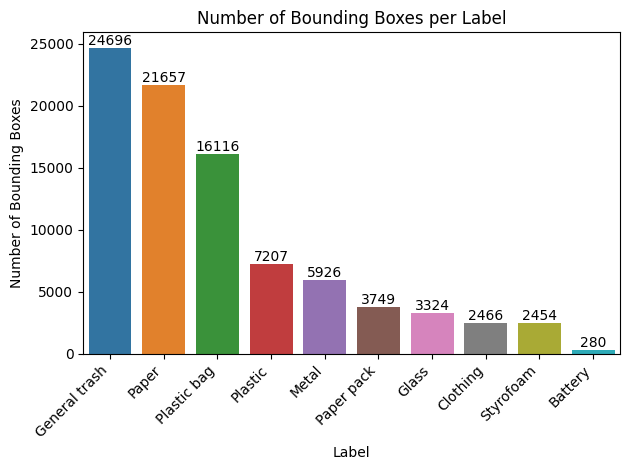

In [51]:
# 라벨(label)별 Bounding Box의 갯수 계산
label_bbox_counts = new_df.groupby('label_name').size().reset_index(name='bbox_count')
# 'bbox_count' 열을 기준으로 내림차순 정렬
label_bbox_counts_sorted = label_bbox_counts.sort_values(by='bbox_count', ascending=False)
print(label_bbox_counts_sorted)

# 바 그래프 그리기
ax=sns.barplot(x='label_name', y='bbox_count', data=label_bbox_counts_sorted, order=label_bbox_counts_sorted['label_name'])
plt.title('Number of Bounding Boxes per Label')
plt.xlabel('Label')
plt.ylabel('Number of Bounding Boxes')

for index, value in enumerate(label_bbox_counts_sorted['bbox_count']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# x 축 레이블 설정
plt.xticks(rotation=45, ha='right', fontsize=10)  # x 축 레이블 회전 및 정렬, 폰트 크기 조절
plt.tight_layout()  # 레이아웃 조정

plt.show()

# 이미지 bbox 및 label 시각화

random_image: ../../dataset/test/4334.jpg
Number of Bounding Boxes: 6
Unique Labels: {'Glass', 'Plastic', 'Metal'}


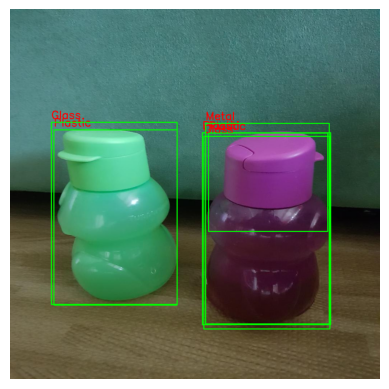

In [56]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random


def visualize_bbox(image_path, bboxes, labels):
    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # bounding box 시각화
    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox
        cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # 이미지 출력
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# CSV 파일에서 데이터 로드
csv_path = '../../level2-objectdetection-cv-07/EDA/your_output_file.csv'
df = pd.read_csv(csv_path)

# 이미지의 파일 경로
random_image = random.choice(df['image_id'].unique())
random_image_path = '../../dataset/'+random_image

# 선택한 이미지의 데이터 필터링
selected_data = df[df['image_id'] == random_image]

# 선택한 이미지의 bounding box와 라벨
selected_bboxes = selected_data[['xmin', 'ymin', 'xmax', 'ymax']].values.astype(float)
selected_labels = selected_data['label_name'].tolist()

# 출력을 위한 디버깅 정보
print("random_image:", random_image_path)
print("Number of Bounding Boxes:", len(selected_bboxes))
print("Unique Labels:", set(selected_labels))

# 시각화 함수 호출
visualize_bbox(random_image_path, selected_bboxes, selected_labels)
